Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. 
It involves investigating and visualizing data to understand its main characteristics before making any assumptions or building predictive models. 
EDA helps you:
1.Understand the structure of your data

2.Identify patterns and trends

3.Spot anomalies

4.Generate hypotheses

Descriptive Statistics: Mean, median, mode, standard deviation, etc.
    
Data Visualization: Histograms, box plots, scatter plots, etc.
    
Handling Missing Data: Identifying and dealing with missing values.
    
Identifying Outliers:detecting unsual datapoints

lets start EDA by considering titanic dataset:


In [3]:
##1.load dataset:
import pandas as pd
import seaborn as sns
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
##2.basic inspection of data:
##Let's start by inspecting the structure of the dataset, including data types, summary statistics, and identifying any missing values.
##Display summary of dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
##3.handking missing values:
df['age'].fillna(df['age'].mean(),inplace=True)  ##handling numerical value
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True) ##handling categorical vqlue
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


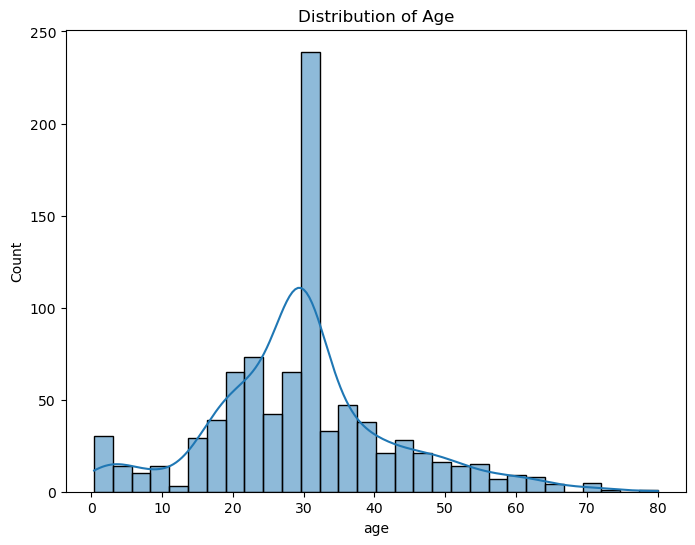

In [19]:
##4.visualize the data distributions:
import matplotlib.pyplot as plt
import seaborn as sns
##plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.show()



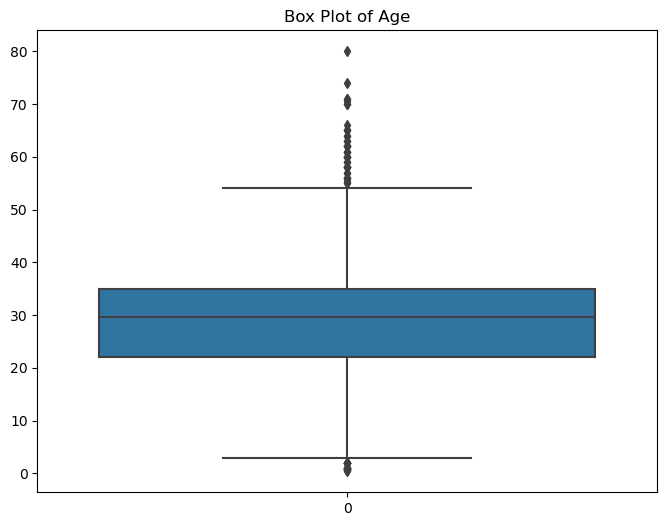

In [20]:
# Plot a box plot of 'age'
plt.figure(figsize=(8, 6))
sns.boxplot(df['age'])
plt.title('Box Plot of Age')
plt.show()

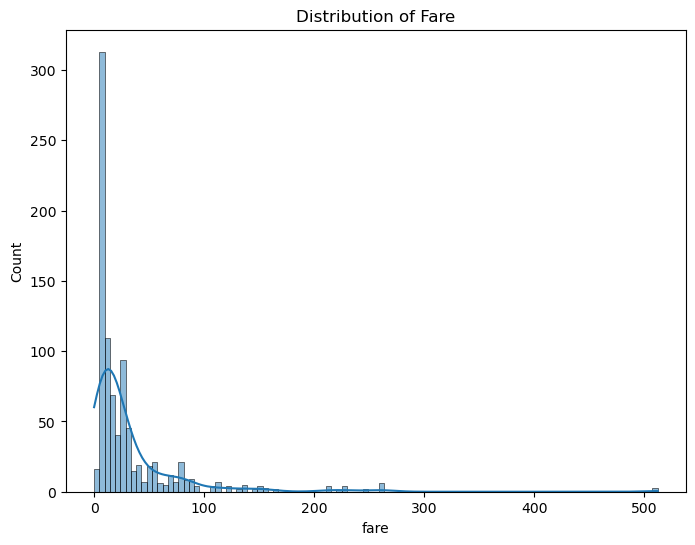

In [21]:
# Plot a histogram of 'fare'
plt.figure(figsize=(8, 6))
sns.histplot(df['fare'], kde=True)
plt.title('Distribution of Fare')
plt.show()

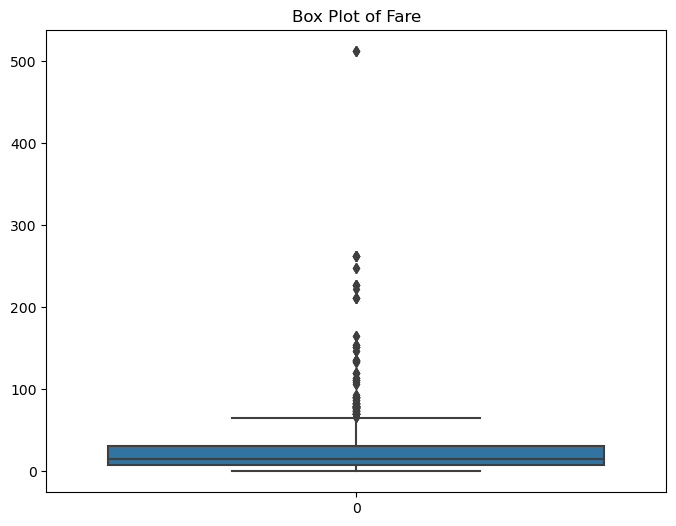

In [22]:
# Plot a box plot of 'fare'
plt.figure(figsize=(8, 6))
sns.boxplot(df['fare'])
plt.title('Box Plot of Fare')
plt.show()

3    491
1    216
2    184
Name: pclass, dtype: int64


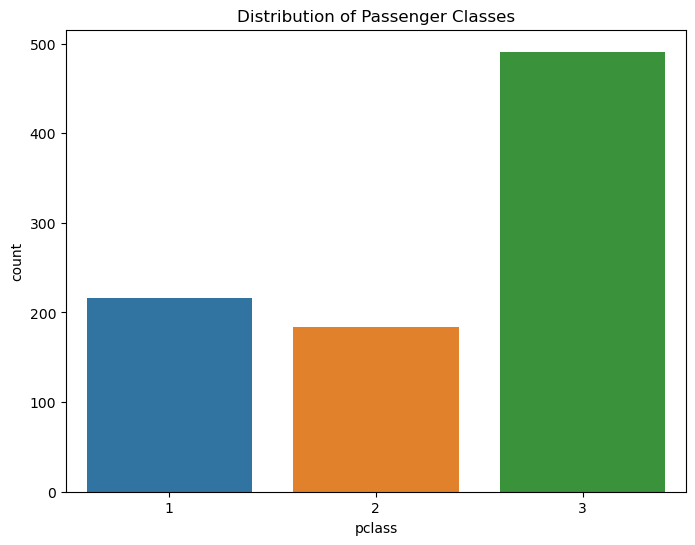

In [26]:
#5.Analyzing categorical variables:
##count occurences of pclass:
# Count occurrences of each category in 'pclass'
pclass_counts = df['pclass'].value_counts()
print(pclass_counts)

# Plot a bar chart of 'pclass'
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', data=df)
plt.title('Distribution of Passenger Classes')
plt.show()



male      577
female    314
Name: sex, dtype: int64


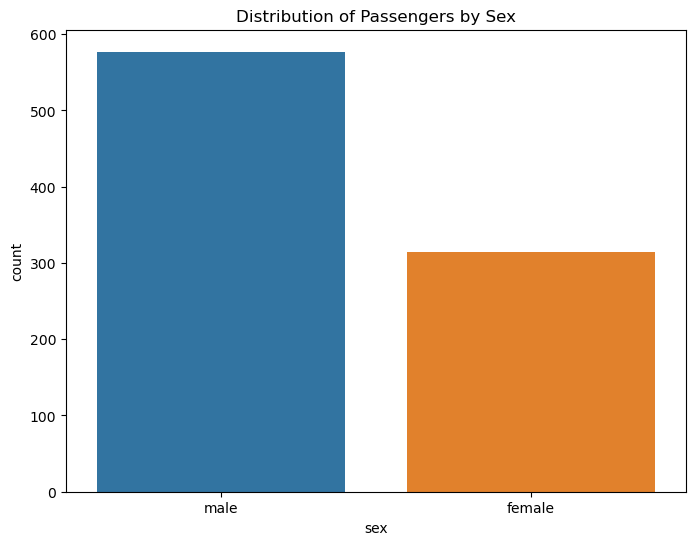

In [27]:
# Count occurrences of each category in 'sex'
sex_counts = df['sex'].value_counts()
print(sex_counts)

# Plot a bar chart of 'sex'
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df)
plt.title('Distribution of Passengers by Sex')
plt.show()


In [29]:
#6Detecting and handling outliers:
# Calculate the IQR for 'fare'
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['fare'] < lower_bound) | (df['fare'] > upper_bound)]
print(outliers)


     survived  pclass     sex        age  sibsp  parch      fare embarked  \
1           1       1  female  38.000000      1      0   71.2833        C   
27          0       1    male  19.000000      3      2  263.0000        S   
31          1       1  female  29.699118      1      0  146.5208        C   
34          0       1    male  28.000000      1      0   82.1708        C   
52          1       1  female  49.000000      1      0   76.7292        C   
..        ...     ...     ...        ...    ...    ...       ...      ...   
846         0       3    male  29.699118      8      2   69.5500        S   
849         1       1  female  29.699118      1      0   89.1042        C   
856         1       1  female  45.000000      1      1  164.8667        S   
863         0       3  female  29.699118      8      2   69.5500        S   
879         1       1  female  56.000000      0      1   83.1583        C   

     class    who  adult_male deck  embark_town alive  alone  
1    First  

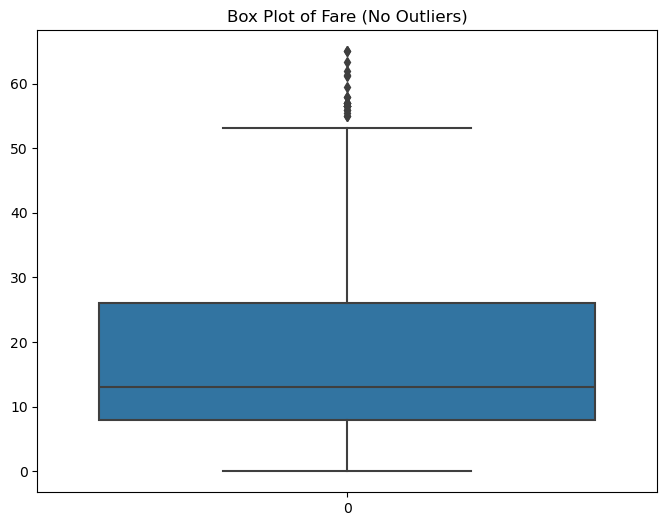

In [30]:
#remove outliers in the data:
# Remove outliers from the dataset
df_no_outliers = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]

# Verify that outliers have been removed
plt.figure(figsize=(8, 6))
sns.boxplot(df_no_outliers['fare'])
plt.title('Box Plot of Fare (No Outliers)')
plt.show()


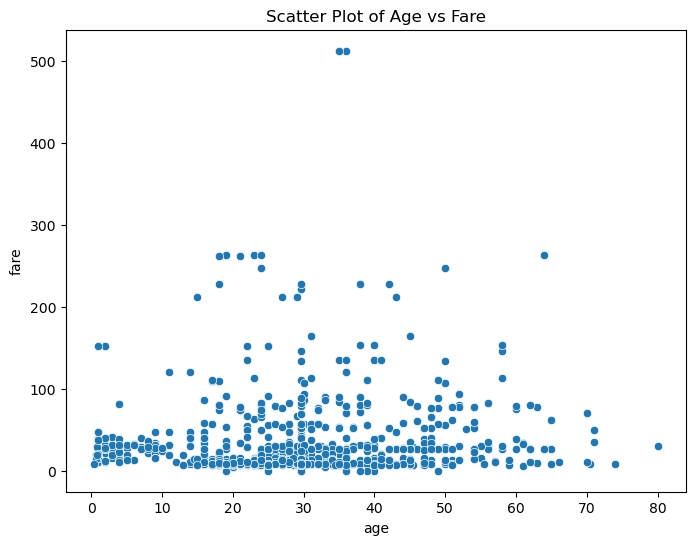

Correlation between Age and Fare: 0.09156609328505762


In [32]:
#7.Analyzing relation btw variables:
# Scatter plot of 'age' vs 'fare'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='fare', data=df)
plt.title('Scatter Plot of Age vs Fare')
plt.show()

# Calculate the correlation coefficient
correlation = df['age'].corr(df['fare'])
print(f"Correlation between Age and Fare: {correlation}")


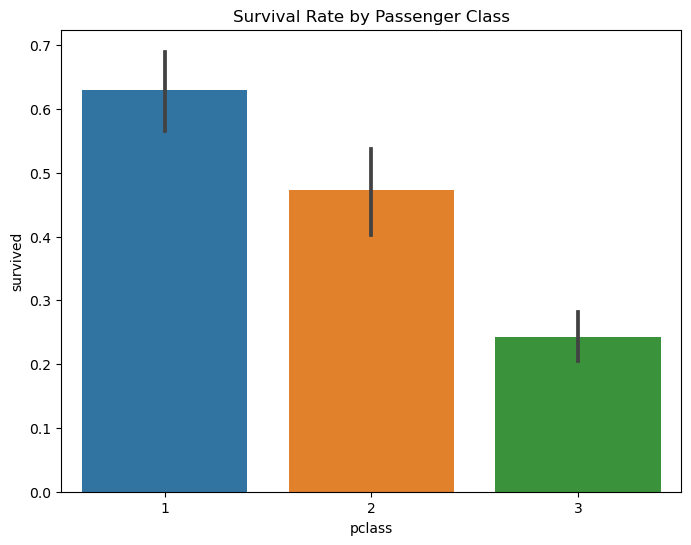

In [33]:
# Bar plot of 'pclass' vs 'survived'
plt.figure(figsize=(8, 6))
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()
